In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
cmap = ListedColormap(['#FF0000','#00FF00'])

In [5]:
data = pd.read_csv('breastcancerdownload.csv')

In [6]:
X , y = data.iloc[:,2:32], data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 28)

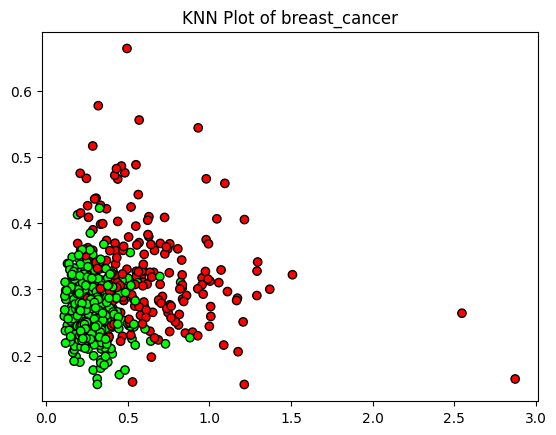

In [ ]:
plt.figure()
plt.scatter(X[:,10],X[:,28], c=y, cmap=cmap, edgecolor='k')
plt.title("KNN Plot of breast_cancer")
plt.show()

In [ ]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    #print(x1," ",x2)
    distance = np.sqrt(np.sum((x1-x2)**2)) #this will take every feature perform the same operation with every correspondinf feature
    return distance 

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        #print("features",X)
        self.y_train = y
        #print("labels",y)

    def predict(self, X): #test cases incoming features only 
        predictions = [self._predict(x) for x in X] #for every feature in test case apply _predict
        return predictions

    def _predict(self, x):
        #print("feature in _predict",x) test cases coming one by one
        # compute the distance
        #print(x)
        #print(self.X_train) #machine trained data
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train] #senf test case with trained 
        #print(distances)# distance will the list of distances values will be in points
        # get the closest k
        k_indices = np.argsort(distances)[:self.k] #? key point providing self will cut the rest of array keeping only k elements inside
        #print(k_indices) #agrsort is by index so it kindicies will save k index having smallest values 
        #print(len(k_indices)) len of k indices will depend on k ofc
        #print(len(self.y_train))
        #print("k indicies : ",k_indices)
        k_nearest_labels = [self.y_train[i] for i in k_indices]#in indexs pe jo label pra hy y train me wo de do because unhi indexs pe hmara distance minimum aya hy jiski wja se wo k indices me pary hue hen 
        #print("trained labels : ",self.y_train)
        #print("k nearest : ",k_nearest_labels)
        #k nearest labels will have k labels which gave least distance to a given sample
        # majority voye (here we will see where does this sample label fall)
        most_common = Counter(k_nearest_labels).most_common() #from counter we will find which label occured most
        #print("most common :",most_common) #all counts
        #print("most common [0][0]:",most_common[0][0]) #will igve value with most counts
        return most_common[0][0]

In [ ]:
clf = KNN(k=5) 
clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)

In [ ]:
print("predictions : ",predictions)
print("actual result : ",y_test)
print("boolean check :",(predictions==y_test))

predictions :  [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
actual result :  [1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1]
boolean check : [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [ ]:
acc = np.sum(predictions == y_test) / len(y_test)
print("accuray : ",acc*100)

accuray :  96.49122807017544
